## Example of Jupyter/Ginga widget

This is an example of creating a Jupyter data viewer widget using a Jupyter image
widget and the Ginga viewer toolkit.

In [19]:
# create a Jupyter image that will be our display surface
# format can be 'jpeg' or 'png'; specify width and height to set viewer size
# PNG will be a little clearer, especially with overlaid graphics, but
# JPEG is faster to update
import ipywidgets as widgets
jup_img = widgets.Image(format='jpeg', width=500, height=500)

In [20]:
# Boilerplate to create a Ginga viewer connected to this widget
# this could be simplified, or hidden behind a class or convenience 
# method
from ginga.misc.log import get_logger
logger = get_logger("my viewer", log_stderr=True, level=20)

from ginga.web.jupyterw.ImageViewJpw import EnhancedCanvasView
v1 = EnhancedCanvasView(logger=logger)
v1.set_widget(jup_img)

# Most ginga back ends create a bindings object for you.
# Because we don't have any UI events on a Jupyter Image widget (yet),
# it doesn't create one as it will not work properly for everything.
# It is, nevertheless, useful for connecting to some controls like
# panning.  So we create one here.
from ginga.Bindings import ImageViewBindings
bd = ImageViewBindings(logger)
bd.enable_all(True)

In [24]:
# Create a very basic GUI with two sliders for panning and two
# buttons for zooming.  There are no event callbacks for actions
# on the image widget, so we have to do everything with external
# controls

# Again, could be folded into a class or convenience method to 
# create a viewer on demand

hpan = widgets.FloatSlider(
    value=5.0,
    min=0,
    max=10.0,
    step=0.5,
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    slider_color='white'
)
vpan = widgets.FloatSlider(
    value=5.0,
    min=0,
    max=10.0,
    step=0.5,
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
    slider_color='white'
)

# callback for panning
def pan_pct(hpan, vpan):
    bd.pan_by_pct(v1, hpan.value / 10., vpan.value / 10.)

hpan.observe(lambda w: pan_pct(hpan, vpan))
vpan.observe(lambda w: pan_pct(hpan, vpan))

zoom_in = widgets.Button(
    description='+',
    tooltip='Zoom in the image',
)
zoom_in.on_click(lambda btn: v1.zoom_in())
zoom_out = widgets.Button(
    description='-',
    tooltip='Zoom out the image',
)
zoom_out.on_click(lambda btn: v1.zoom_out())

widgets.HBox([widgets.VBox([jup_img, hpan]), widgets.VBox([vpan, zoom_in, zoom_out])])

In [22]:
# Load a FITS file.  You should see the embedded image update.
v1.load_fits("/Users/eric/testdata/SPCAM/SUPA01118766.fits")

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


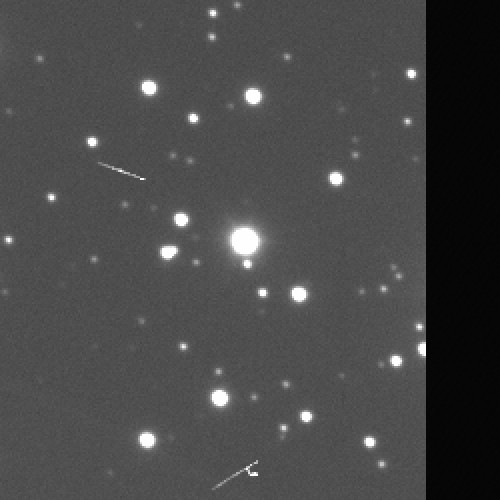

In [23]:
# grab a screenshot.
v1.show()

You can now do nearly everything that can be done with a regular "pg" type ginga web widget.
The big difference is that this Jupyter widget currently has no cursor, mouse or keyboard interaction.
You have to add your own widgets or use programmatic control for any interaction.

In [6]:
v1.cut_levels(0, 500)

In [7]:
v1.auto_levels()

In [ ]:
v1.zoom_to(10)

In [ ]:
v1.set_pan(1420.4, 1210.3)